In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

(2196, 3017, 3)


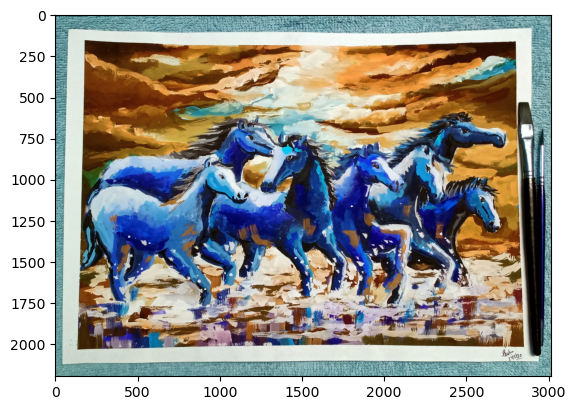

In [71]:
img=cv2.imread('Horse.jpg')
print(img.shape)

plt.imshow(img)

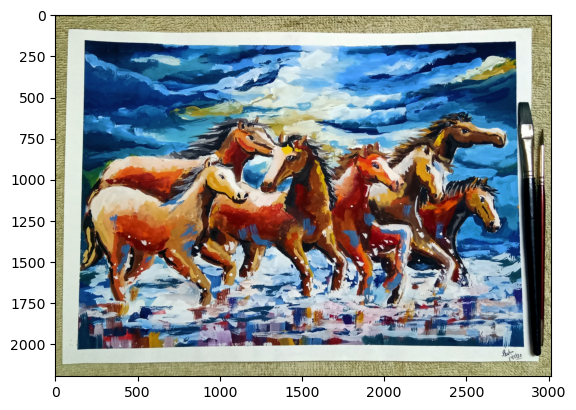

In [72]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [73]:
img = img.reshape((img.shape[0] * img.shape[1],img.shape[2]))

In [74]:
k = 5
kmeans = KMeans(n_clusters = k) # "pick out" the K-means tool from our collection of algorithms
kmeans.fit(img) # apply the model to our data, the image
centroid=kmeans.cluster_centers_
print(centroid)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[117.57292358  54.09975368  29.77627118]
 [206.84146229 217.49594173 216.10523803]
 [169.71950841 152.92938917 108.45035555]
 [ 67.41589019 136.74055506 190.42184492]
 [ 20.25174986  40.92416254  70.5027368 ]]


In [75]:
#determining labels
labels=kmeans.labels_
print(labels)
labels=list(labels)

[2 2 2 ... 2 2 2]


In [76]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(kmeans.labels_))
  percent.append(j)
print(percent)

[0.14335719326971086, 0.3017083521248445, 0.19414815740554586, 0.13842370465359322, 0.2223625925463056]


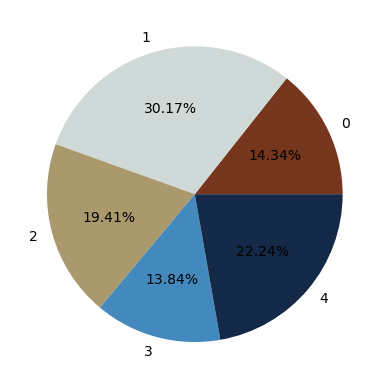

In [77]:
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)),autopct='%1.2f%%')
plt.show()

In [78]:
img_init = img.copy()

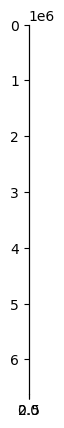

In [79]:
#plt.figure (figsize = (6,6))
# plot initial image 

plt.imshow(img_init)

In [80]:
label_indx = np.arange(0,len(np.unique(kmeans.labels_)) + 1) 

In [81]:
np.histogram(labels,bins=label_indx)


(array([ 949789, 1998918, 1286296,  917103, 1473226], dtype=int64),
 array([0, 1, 2, 3, 4, 5]))

In [82]:
(hist,_)=np.histogram(labels,bins=label_indx)
hist=hist.astype("float")
hist /=hist.sum()
hist *100

array([14.33571933, 30.17083521, 19.41481574, 13.84237047, 22.23625925])

(hist,_)=np.histogram(clt.labels_,bins=label_indx)
hist=hist.astype("float")
hist /=hist.sum()
hist *100

In [83]:
hist_bar = np.zeros((50, 300, 3), dtype = "uint8")

In [84]:
startX = 0
for (percent, color) in zip(hist,  kmeans.cluster_centers_): 
  endX = startX + (percent * 300) # to match grid
  cv2.rectangle(hist_bar, (int(startX), 0), (int(endX), 50),
      color.astype("uint8").tolist(), -1)
  startX = endX

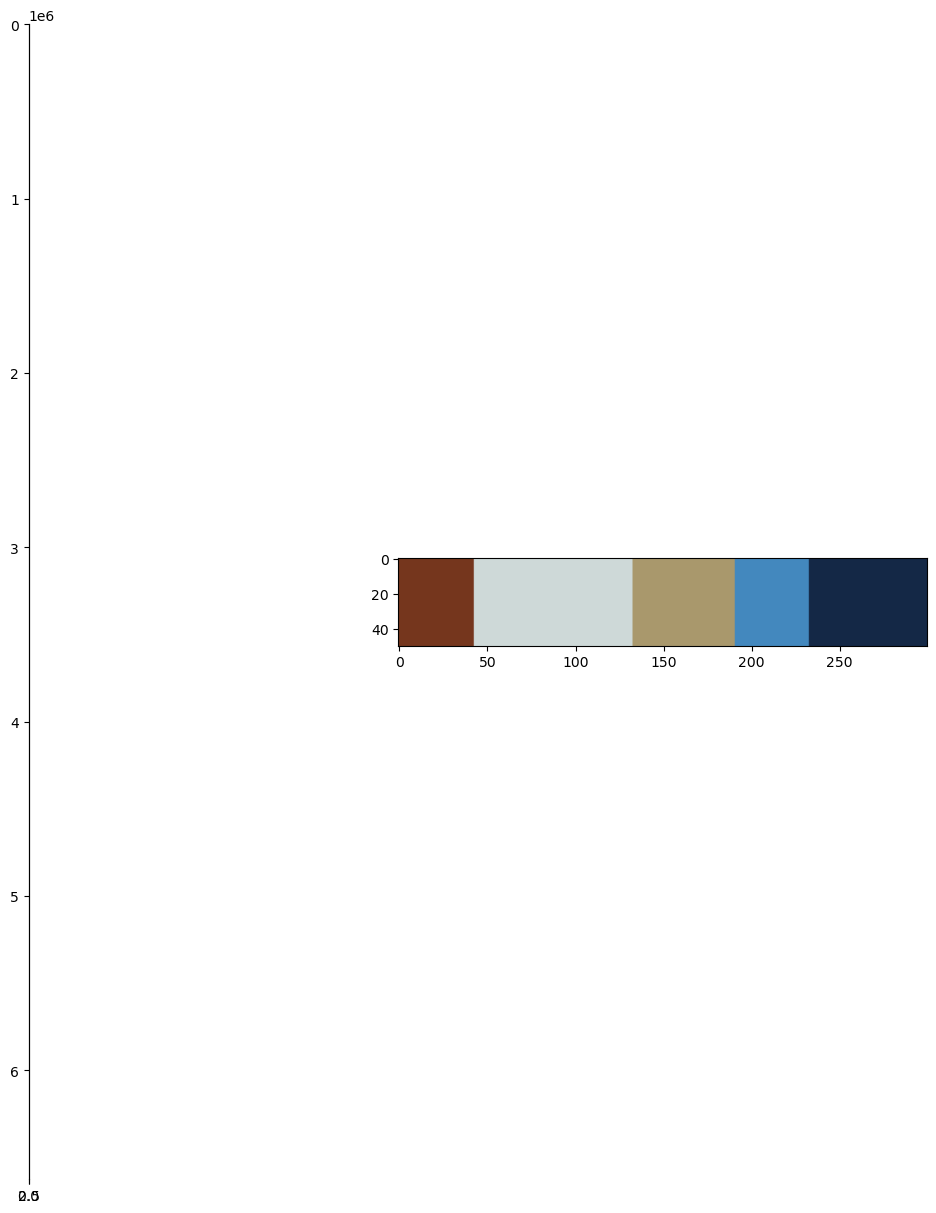

In [85]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img_init)
plt.subplot(122)
plt.imshow(hist_bar)
plt.show()